In [86]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from pandas import read_csv
#reading the CSV file
my_data=pd.read_csv(r'C:\university\second semeaster\Data Science\Brain Stroke prediction project\Full_data.csv')
print("The data shape is:")
print(my_data.shape)




The data shape is:
(4981, 11)


In [87]:
print("Five first rows of data")
print(my_data.head(5))


Five first rows of data
   gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
2  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
3  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
4    Male  81.0             0              0          Yes        Private          Urban             186.21  29.0  formerly smoked       1


In [88]:
print("five last rows of the data")
print(my_data.tail(5))

five last rows of the data
      gender   age  hypertension  heart_disease ever_married work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
4976    Male  41.0             0              0           No   Private          Rural              70.15  29.8  formerly smoked       0
4977    Male  40.0             0              0          Yes   Private          Urban             191.15  31.1           smokes       0
4978  Female  45.0             1              0          Yes  Govt_job          Rural              95.02  31.8           smokes       0
4979    Male  40.0             0              0          Yes   Private          Rural              83.94  30.0           smokes       0
4980  Female  80.0             1              0          Yes   Private          Urban              83.75  29.1     never smoked       0


In [89]:
print(my_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [90]:
#printing rows containing empty variables
empty_data=my_data[my_data.isna().any(axis=1)]
print("#####Missing data#######")
print(empty_data)
#It doesn't show any missing data

print(my_data.dtypes)


print(my_data['gender'].unique())
print(my_data['ever_married'].unique())
print(my_data['work_type'].unique())
print(my_data['Residence_type'].unique())
print(my_data['smoking_status'].unique())


my_data['gender'][my_data['gender'] == 'Male'] = 0
my_data['gender'][my_data['gender'] == 'Female'] = 1

my_data['ever_married'][my_data['ever_married'] == 'Yes'] = 0
my_data['ever_married'][my_data['ever_married'] == 'No'] = 1

my_data['work_type'][my_data['work_type'] == 'Private'] = 0
my_data['work_type'][my_data['work_type'] == 'Self-employed'] = 1
my_data['work_type'][my_data['work_type'] == 'Govt_job'] = 2
my_data['work_type'][my_data['work_type'] == 'children'] = 3

my_data['Residence_type'][my_data['Residence_type'] == 'Urban'] = 0
my_data['Residence_type'][my_data['Residence_type'] == 'Rural'] = 1

my_data['smoking_status'][my_data['smoking_status'] == 'formerly smoked'] = 0
my_data['smoking_status'][my_data['smoking_status'] == 'never smoked'] = 1
my_data['smoking_status'][my_data['smoking_status'] == 'smokes'] = 2
my_data['smoking_status'][my_data['smoking_status'] == 'Unknown'] = 3


my_data.head()

print(my_data.dtypes)



#####Missing data#######
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dty

<ipython-input-90-2a1210dea720>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['gender'][my_data['gender'] == 'Male'] = 0
<ipython-input-90-2a1210dea720>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['gender'][my_data['gender'] == 'Female'] = 1
<ipython-input-90-2a1210dea720>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['ever_married'][my_data['ever_married'] == 'Yes'] = 0
<ipython-input-90-2a1210dea

In [91]:
my_data.isnull().sum()
my_data.isna().any()

#we use this code if it had missing values
#use the simpleImputer function to replace missing values
#imputer=SimpleImputer(strategy='mean')
#imputer.fit(my_data)
#new_data=imputer.transform(my_data)
#my_data=pd.DataFrame(new_data,columns=new_header_names)

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [92]:
print(my_data.shape)
#Count duplicate in a DataFrame
print(my_data.duplicated().sum())

# Count the number of non-duplicates
#print(~my_data.duplicated().sum())


#my_data.drop_duplicates(inplace=True)
my_data.shape
#There is not any dublicate value

(4981, 11)
0


(4981, 11)

In [93]:

print("Data types are: ")
print("dataset before changing objects to numeric")
print(my_data.dtypes)
print("---------------------------------------------------")
#print(my_data.dtypes)
my_data['gender']=pd.to_numeric(my_data['gender'], errors='coerce')
my_data['ever_married']=pd.to_numeric(my_data['ever_married'], errors='coerce')
my_data['work_type']=pd.to_numeric(my_data['work_type'], errors='coerce')
my_data['Residence_type']=pd.to_numeric(my_data['Residence_type'], errors='coerce')
my_data['smoking_status']=pd.to_numeric(my_data['smoking_status'], errors='coerce')


print("dataset after changing objects to numeric")
print(my_data.dtypes)
print("---------------------------------------------------")

my_data=my_data.applymap(np.float)

print("dataset after changing int to float")
print(my_data.dtypes)
print("---------------------------------------------------")



Data types are: 
dataset before changing objects to numeric
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
---------------------------------------------------
dataset after changing objects to numeric
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object
---------------------------------------------------
dataset after changing int to float
gender               float64
age                  float64
hypertension         float64
heart

<ipython-input-93-8d243c152bdb>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_data=my_data.applymap(np.float)


In [94]:
my_data.head

<bound method NDFrame.head of       gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke
0        0.0  67.0           0.0            1.0           0.0        0.0             0.0             228.69  36.6             0.0     1.0
1        0.0  80.0           0.0            1.0           0.0        0.0             1.0             105.92  32.5             1.0     1.0
2        1.0  49.0           0.0            0.0           0.0        0.0             0.0             171.23  34.4             2.0     1.0
3        1.0  79.0           1.0            0.0           0.0        1.0             1.0             174.12  24.0             1.0     1.0
4        0.0  81.0           0.0            0.0           0.0        0.0             0.0             186.21  29.0             0.0     1.0
...      ...   ...           ...            ...           ...        ...             ...                ...   ...             ...     ...
4976

In [95]:
my_data.describe()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.341498,0.825336,0.491668,105.943562,28.498173,1.584019,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.101664,0.499981,45.075373,6.790464,1.092516,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.850000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [96]:

print("------Median in csv fil:------")
print(my_data.median(numeric_only=True))

print("------Mean in csv fil:-------")
print(my_data.mean(numeric_only=True))

print("------Mode in csv fil:-------")
print(my_data.mode(numeric_only=True))

------Median in csv fil:------
gender                1.00
age                  45.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level    91.85
bmi                  28.10
smoking_status        1.00
stroke                0.00
dtype: float64
------Mean in csv fil:-------
gender                 0.583618
age                   43.419859
hypertension           0.096165
heart_disease          0.055210
ever_married           0.341498
work_type              0.825336
Residence_type         0.491668
avg_glucose_level    105.943562
bmi                   28.498173
smoking_status         1.584019
stroke                 0.049789
dtype: float64
------Mode in csv fil:-------
   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke
0     1.0  78.0           0.0            0.0           0.0        0.0             0.0          

In [97]:
#checking for skewness in cryptos data
print(my_data.skew())
print("-----------------------------")


gender              -0.339351
age                 -0.144001
hypertension         2.740377
heart_disease        3.896191
ever_married         0.668689
work_type            0.955789
Residence_type       0.033341
avg_glucose_level    1.587526
bmi                  0.371553
smoking_status       0.077397
stroke               4.140942
dtype: float64
-----------------------------


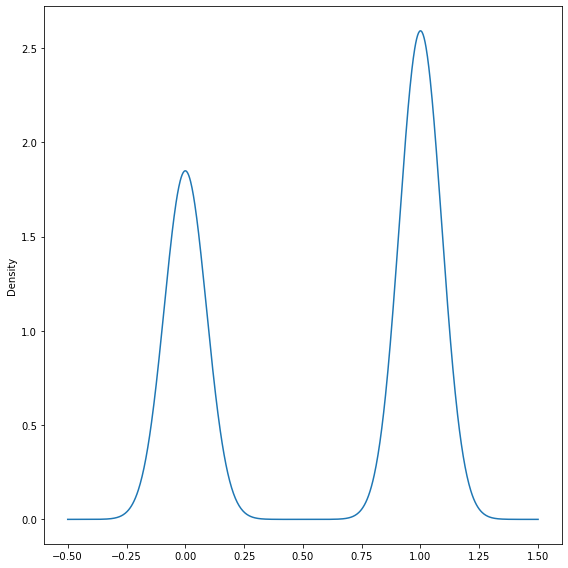

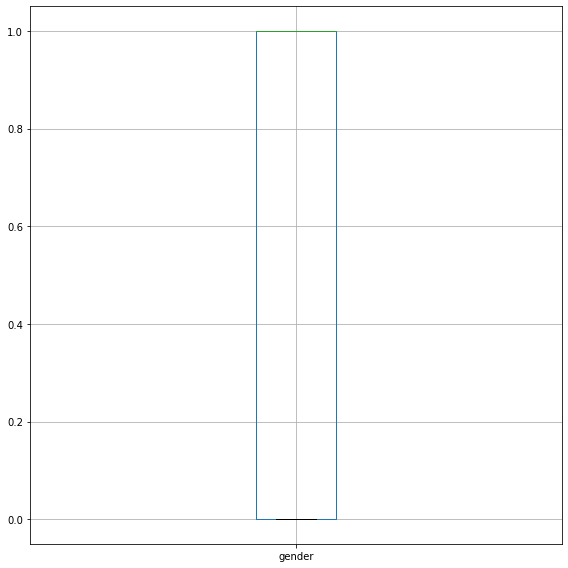

In [98]:
my_data["gender"].plot.kde()
plt.show()
my_data.boxplot(column=["gender"])

plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

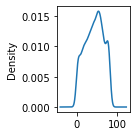

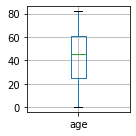

In [99]:
#visualising our data

#pd.set_option('display.width',1000)
#pd.set_option('display.precision',2)
my_data["age"].plot.kde()
plt.show()
#Age is normally distributed

my_data.boxplot(column=["age"])

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

plt.show()
#age doesn't have any outliers


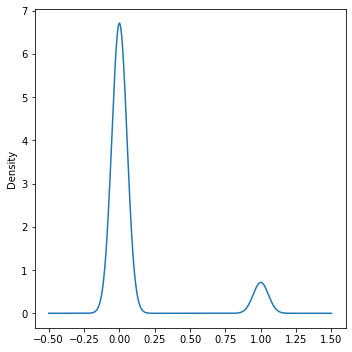

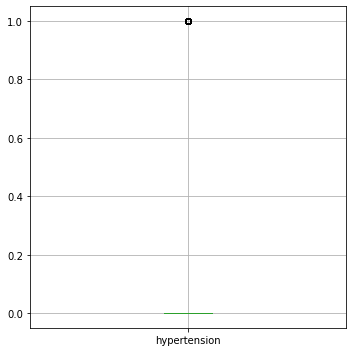

In [100]:
my_data["hypertension"].plot.kde()
plt.show()

my_data.boxplot(column=["hypertension"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

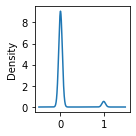

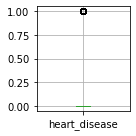

In [101]:
my_data["heart_disease"].plot.kde()
plt.show()

my_data.boxplot(column=["heart_disease"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

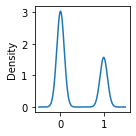

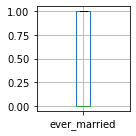

In [102]:
my_data["ever_married"].plot.kde()
plt.show()

my_data.boxplot(column=["ever_married"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

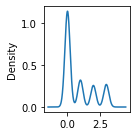

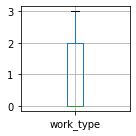

In [103]:
my_data["work_type"].plot.kde()
plt.show()

my_data.boxplot(column=["work_type"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

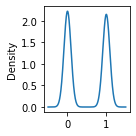

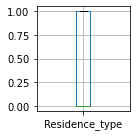

In [104]:
my_data["Residence_type"].plot.kde()
plt.show()


my_data.boxplot(column=["Residence_type"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

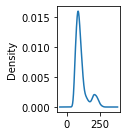

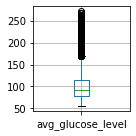

In [105]:
my_data["avg_glucose_level"].plot.kde()
plt.show()

my_data.boxplot(column=["avg_glucose_level"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

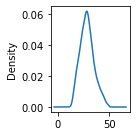

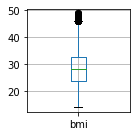

In [106]:
my_data["bmi"].plot.kde()
plt.show()

my_data.boxplot(column=["bmi"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

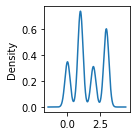

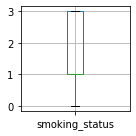

In [107]:
my_data["smoking_status"].plot.kde()
plt.show()

my_data.boxplot(column=["smoking_status"])
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

In [108]:
#We realised most of our data is not normally distributes
#This peace of code will normalised out dataset
#but at the moment we don't need this part 
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
my_data_normalizer=Normalizer(norm='l1').fit(my_data)
my_normalised_data=my_data_normalizer.transform(my_data)


set_printoptions(precision=2)
print("\n My Normalized data \n", my_normalised_data[0:3])


 My Normalized data 
 [[0.   0.2  0.   0.   0.   0.   0.   0.68 0.11 0.   0.  ]
 [0.   0.36 0.   0.   0.   0.   0.   0.48 0.15 0.   0.  ]
 [0.   0.19 0.   0.   0.   0.   0.   0.66 0.13 0.01 0.  ]]


C:\Users\nastaran\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


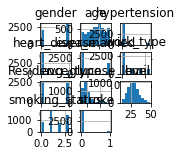

In [109]:
#visualising our data for ticker
pd.set_option('display.width',1000)
my_data.hist()
plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
plt.show()

In [110]:
import scipy.stats as stats

from scipy.stats import kurtosis
kurtosis(my_data)

array([-1.88, -1.  ,  5.51, 13.17, -1.55, -0.6 , -2.  ,  1.75, -0.14,
       -1.35, 15.14])

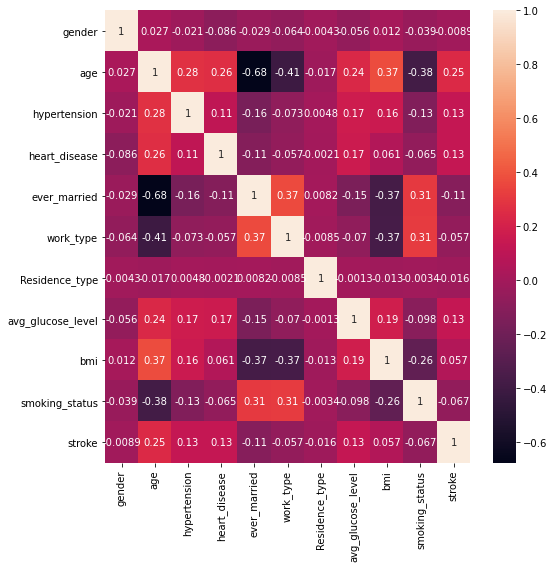

In [111]:

#Create a Correlation Matrix using Pandas
corrMatrix_for_all=my_data.corr()
#print(corrMatrix_for_all)
#Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix_for_all, annot=True)
plt.rcParams["figure.figsize"] = [13,13]
plt.rcParams["figure.autolayout"] = True
plt.show()


In [112]:
correMatrix_for_stroke=my_data.corr()[['stroke']]
correMatrix_for_stroke.style.background_gradient(cmap='YlOrRd').set_precision(2)


,stroke
gender,-0.01
age,0.25
hypertension,0.13
heart_disease,0.13
ever_married,-0.11
work_type,-0.06
Residence_type,-0.02
avg_glucose_level,0.13
bmi,0.06
smoking_status,-0.07


In [113]:
#bivariate Analysis
#correlation image shows that age,hypertension, heart disease and avarage glucose leve;es are correlated with stroke


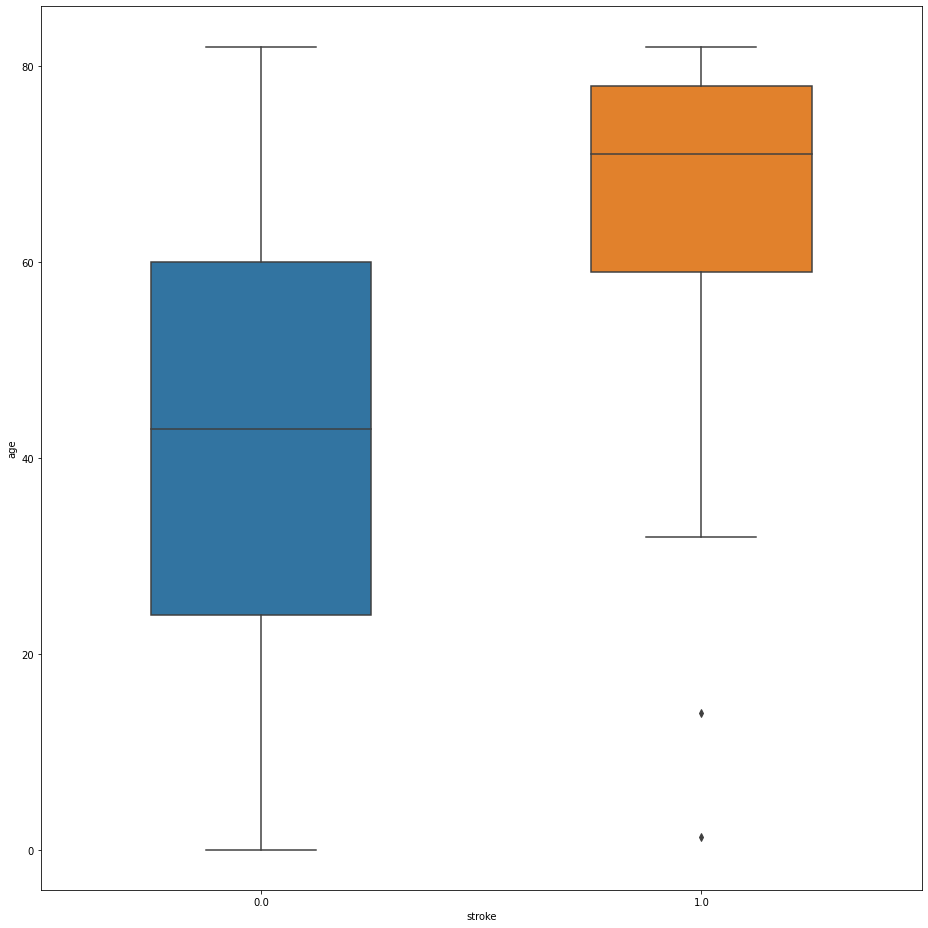

In [114]:
#Bivariate age and stroke
import seaborn as sns
ax=sns.boxplot(x='stroke', y='age', data=my_data, width=0.5)
ax.set(xlabel='stroke', ylabel='age')
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

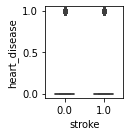

In [115]:
#Bivariate heart disease and stroke
import seaborn as sns
ax=sns.boxplot(x='stroke',y='heart_disease', data=my_data, width=0.5)
ax.set(xlabel='stroke', ylabel='heart_disease')
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.show()

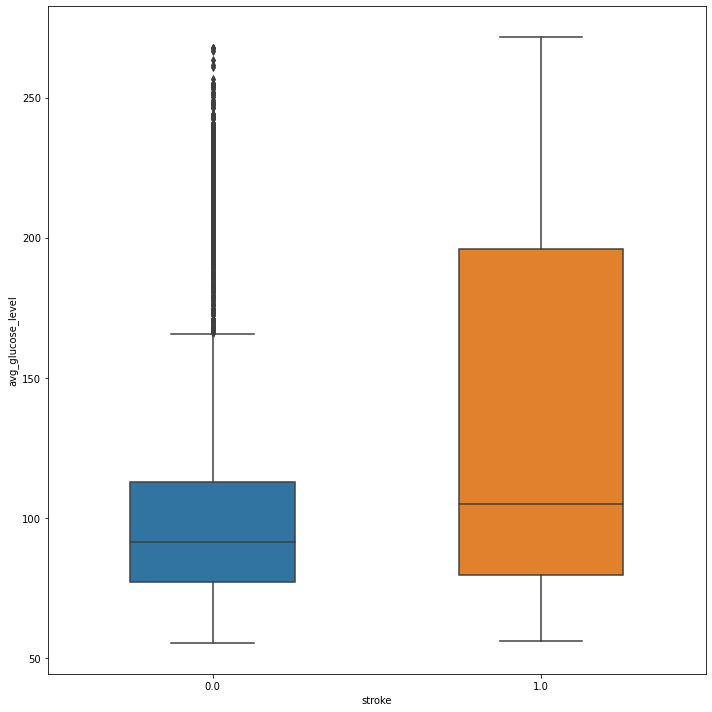

In [116]:
#Bivariate avg_glucose_level and stroke
import seaborn as sns
ax=sns.boxplot(x='stroke', y='avg_glucose_level', data=my_data, width=0.5)
ax.set(xlabel='stroke', ylabel='avg_glucose_level')
plt.rcParams["figure.figsize"] = [2,2]
plt.rcParams["figure.autolayout"] = True
plt.show()

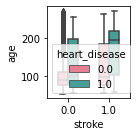

In [117]:
#Bivariate heart disease and stroke and avg-#glucose_level
import seaborn as sns
ax=sns.boxplot(x='stroke', y='avg_glucose_level' , hue='heart_disease', data=my_data, width=0.5, palette = 'husl')
ax.set(xlabel='stroke', ylabel='age')
plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
plt.show()

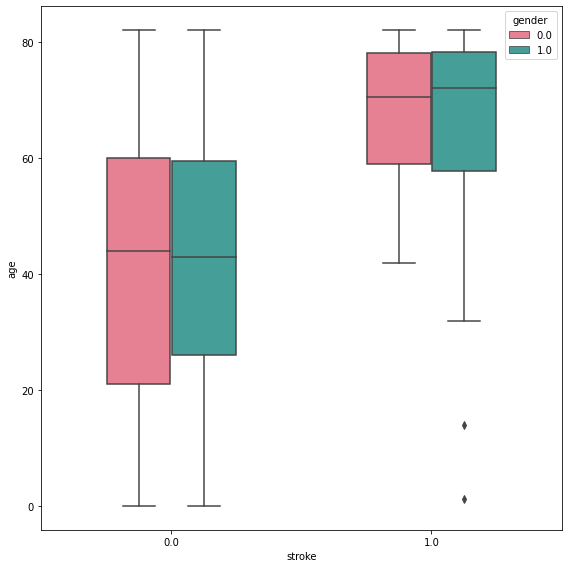

In [118]:
#age, stroke and gender
ax=sns.boxplot(x='stroke', y='age' , hue='gender', data=my_data, width=0.5, palette = 'husl')
ax.set(xlabel='stroke', ylabel='age')

plt.rcParams["figure.figsize"] = [3,3]
plt.rcParams["figure.autolayout"] = True
plt.show()


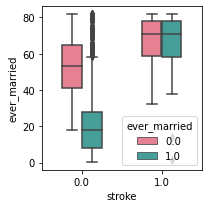

In [119]:
#age, stroke and ever_married
ax=sns.boxplot(x='stroke', y='age' , hue='ever_married', data=my_data, width=0.5, palette = 'husl')
ax.set(xlabel='stroke', ylabel='ever_married')
plt.rcParams["figure.figsize"] = [5, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.show()

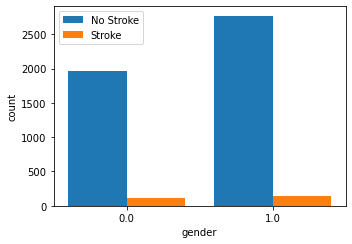

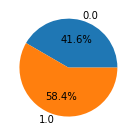

In [120]:
#gender and stroke
ax=sns.countplot(x='gender', data=my_data,hue='stroke',saturation=1, dodge=True)

plt.legend(['No Stroke','Stroke'])

plt.rcParams["figure.figsize"] = [4,2]
plt.xlabel('gender')
plt.show()

my_data.groupby('gender').size().plot(kind='pie',autopct='%.1f%%')
plt.ylabel('')
plt.show()

In [121]:


###data modeling#########
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
print(my_data.shape)
y=my_data.pop('stroke')
X=my_data
print(y.shape)
print(X.shape)

(4981, 11)
(4981,)
(4981, 10)


In [122]:
#split 60-40 
#print(X)
#print(y)
#splite teh data into train and test  60:40
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

#check the number of train and test data
print('\n The total of training dataset',X_train.shape)
print('\n The total of test dataset', X_test.shape)

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier()
#train teh model to fit
my_model.fit(X_train,y_train)

#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)

#But let’s make this more meaningful. Let’s predict the output for a specific instance.
print('-------------')
pred_one=my_model.predict(X=[[0.0,67.0,0.0,1.0,0.0,0.0,0.0,228.69,36.6,0.0 ]])
print(pred_one)



#view the test data
#X_test.join(y_test)




 The total of training dataset (2988, 10)

 The total of test dataset (1993, 10)
-------------
[1.]


In [123]:
#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')
#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')
#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')
#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)
#view the test data
X_test.join(y_test)

Model accuracy on Train data:1.00 

Model accuracy on Test data:0.91 

The Confusion Matrix: 
 [[1799   93]
 [  80   21]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1892
         1.0       0.18      0.21      0.20       101

    accuracy                           0.91      1993
   macro avg       0.57      0.58      0.57      1993
weighted avg       0.92      0.91      0.92      1993



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2753,0.0,59.0,0.0,0.0,0.0,2.0,0.0,70.04,31.4,1.0,0.0
573,0.0,57.0,0.0,0.0,0.0,0.0,1.0,98.54,30.2,1.0,0.0
1179,1.0,80.0,0.0,0.0,0.0,1.0,1.0,104.07,19.3,0.0,0.0
2155,1.0,69.0,0.0,1.0,1.0,0.0,0.0,198.33,42.7,2.0,0.0
348,1.0,75.0,0.0,0.0,0.0,1.0,1.0,75.39,37.8,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3335,1.0,72.0,1.0,1.0,0.0,0.0,0.0,198.32,31.3,0.0,0.0
4683,1.0,59.0,0.0,0.0,0.0,2.0,0.0,101.19,29.9,0.0,0.0
220,0.0,35.0,0.0,0.0,1.0,0.0,1.0,85.37,33.0,1.0,0.0
2349,0.0,21.0,0.0,0.0,1.0,0.0,1.0,88.29,36.6,2.0,0.0


In [124]:
#The accuracy of the train test is 100% and the accuracy of test set is %93. The model seems predicts well on the test data.
#But having high accuracy on the train set may be a sign of overfitting. 
#Now let's change the train and test set  to 70-30 splite.

#print(X)
#print(y)
#splite teh data into train and test  70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#check the number of train and test data
print('\n The total of training dataset',X_train.shape)
print('\n The total of test dataset', X_test.shape)

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier()
#train teh model to fit
my_model.fit(X_train,y_train)

#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)

#But let’s make this more meaningful. Let’s predict the output for a specific instance.
print('-------------')
pred_one=my_model.predict(X=[[0.0,67.0,0.0,1.0,0.0,0.0,0.0,228.69,36.6,0.0 ]])
print(pred_one)

#As you are aware that the target labels are 2 for benign, 4 for malignant

#view the test data
#X_test.join(y_test)

#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)



 The total of training dataset (3486, 10)

 The total of test dataset (1495, 10)
-------------
[1.]
Model accuracy on Train data:1.00 

Model accuracy on Test data:0.92 

The Confusion Matrix: 
 [[1366   52]
 [  70    7]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1418
         1.0       0.12      0.09      0.10        77

    accuracy                           0.92      1495
   macro avg       0.53      0.53      0.53      1495
weighted avg       0.91      0.92      0.91      1495



In [125]:
#spilit the data into train and test- split using 70-30
#adding seed
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
#check the dimention of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)

#print some test data to view model predictions on instances
#print(X_test[1:5].join(y_test[1:5]))
#print(X_test.tail(5).join(y_test.tail(5)))

#now we can instantiate the model for our model
#in this case the decision tree model is used
#Declare a SEED variable and set to 1 to ensure reproducibility.
SEED=1
my_model= DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=SEED)
#train teh model to fit
my_model.fit(X_train,y_train)

#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)


#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)
#the accuracy score of the train set has reduced from 100% to 95%, while accuracy score on the test set increased tp %95.


 The total of training dataset (3486, 10)

 The total of test dataset (1495, 10)
Model accuracy on Train data:0.95 

Model accuracy on Test data:0.95 

The Confusion Matrix: 
 [[1418    0]
 [  77    0]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1418
         1.0       0.00      0.00      0.00        77

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
#As we are aware that achieving the high accuracy score for the training set does not guarantee the model has truly 
#fits or generalises well, particularly, when this score looks too good in the first instance.
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#spilit the data into train and test- split using 60-40
#set stratify to ‘y’ to ensure the data is split in same proportion of values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
#check the dimention of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)

#print some test data to view model predictions on instances
#print(X_test[1:5].join(y_test[1:5]))
#print(X_test.tail(5).join(y_test.tail(5)))

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier()
#train teh model to fit
my_model.fit(X_train,y_train)

#declare the num of folds
num_folds=KFold(n_splits=10, random_state=1,shuffle=True)
#test by changing n_splits to 3, 5 and 10
#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(my_model,X_train, y_train, cv=num_folds)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )
#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)


#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)


 The total of training dataset (2988, 10)

 The total of test dataset (1993, 10)

Cross Val mean: 0.911 (std: 0.013)

Model accuracy on Train data:1.00 

Model accuracy on Test data:0.90 

The Confusion Matrix: 
 [[1778  116]
 [  86   13]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1894
         1.0       0.10      0.13      0.11        99

    accuracy                           0.90      1993
   macro avg       0.53      0.54      0.53      1993
weighted avg       0.91      0.90      0.90      1993



In [127]:
#The cross-validation score tells us how well the model generalises its learning.
#You will note that the cross validation mean score (90.9%) with a standard deviation of (0.013).
#This means our model has overfit our data as the train score is 100% which is clearly above the bound 
#of the cross validation score. However, you will note that the test score is about equal 
#(within the same range of the cv score) to the cross validation score. 
#Let’s now tune our model by changing the configuration such as declaring the max_depth of 
#our tree and max_samples_leaf, min_samples_splits and criterion. 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
#check the dimention of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)

#print some test data to view model predictions on instances
#print(X_test[1:5].join(y_test[1:5]))
#print(X_test.tail(5).join(y_test.tail(5)))

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.05, random_state=1, criterion='gini')
#train teh model to fit
my_model.fit(X_train,y_train)

#declare the num of folds
num_folds=KFold(n_splits=10, random_state=1,shuffle=True)
#test by changing n_splits to 3, 5 and 10
#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(my_model,X_train, y_train, cv=num_folds)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )




#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)


#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)

#You will note the train set accuracy score is similar within the bound of the cross
#validation accuracy score. This tells us the default model is clearly overfits and the result a better generalisation.



 The total of training dataset (2988, 10)

 The total of test dataset (1993, 10)

Cross Val mean: 0.950 (std: 0.011)

Model accuracy on Train data:0.95 

Model accuracy on Test data:0.95 

The Confusion Matrix: 
 [[1894    0]
 [  99    0]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1894
         1.0       0.00      0.00      0.00        99

    accuracy                           0.95      1993
   macro avg       0.48      0.50      0.49      1993
weighted avg       0.90      0.95      0.93      1993



C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
#Grid Search hyperparameter tuning

from sklearn.model_selection import GridSearchCV
SEED=1
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
#check the dimention of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)


#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier(random_state=SEED)
#print the model default hyperparameters
print('\n Hyperparameters of Default model \n', my_model.get_params(),'\n')

#create a cross validation split
kfolds_split=KFold(n_splits=10)

#declare a dictionary of hyperparameter and values
classifier_hypara=dict()
classifier_hypara['max_depth']=[2,3,4,6,8,10]
classifier_hypara['min_samples_split']=[2,4,6,8,9]
classifier_hypara['min_samples_leaf']=[0.05,0.1,0.5,1]
classifier_hypara['criterion']=['gini','entropy']

#perform a gridsearch and fit the grid
classifier_grid=GridSearchCV(my_model,classifier_hypara, scoring='accuracy', n_jobs=-1, cv=kfolds_split)
classifier_grid_fit=classifier_grid.fit(X,y)

#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(classifier_grid_fit,X_train, y_train, cv=kfolds_split)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )

#we cab print teh hyperparameter tuning results
print('Best Hyperparameters: %s' %classifier_grid_fit.best_params_)
print('Best max_depth=', classifier_grid_fit.best_estimator_.get_params()['max_depth'])
print('Best min_samples_aplit =', classifier_grid_fit.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf =', classifier_grid_fit.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion', classifier_grid_fit.best_estimator_.get_params()['criterion'])


#print best hyperparameteres
print('\n Suggested Best Hyperparameters: \n', classifier_grid_fit.best_estimator_.get_params())
print('best score: %s {:.3f}\n'.format(classifier_grid_fit.best_score_))




 The total of training dataset (2988, 10)

 The total of test dataset (1993, 10)

 Hyperparameters of Default model 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'} 


Cross Val mean: 0.949 (std: 0.012)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 2}
Best max_depth= 2
Best min_samples_aplit = 2
Best min_samples_leaf = 0.05
Best criterion gini

 Suggested Best Hyperparameters: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.05, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'b

In [129]:
#You will note the results suggesting the best hyperparmeters 
#combinations from the declared values in the hyperparameter dictionary 
#(max_depth = 2, min_samples_split = 2, min_samples_leaf =0.05 and criterion =gini). 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
#check the dimention of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)

#print some test data to view model predictions on instances
#print(X_test[1:5].join(y_test[1:5]))
#print(X_test.tail(5).join(y_test.tail(5)))

#now we can instantiate the model for our model
#in this case the decision tree model is used
my_model= DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.05,min_samples_split = 2, random_state=1, criterion='gini')
#train teh model to fit
my_model.fit(X_train,y_train)

#declare the num of folds
num_folds=KFold(n_splits=10, random_state=1,shuffle=True)
#test by changing n_splits to 3, 5 and 10
#compute the array containing the 10 folds and calculate the cros validation mean score
CV_scores=-cross_val_score(my_model,X_train, y_train, cv=num_folds)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores.mean()*-1,CV_scores.std()),end="\n\n" )




#now let's predict the model
y_pred_train=my_model.predict(X_train)
#print(y_pred_train)
y_pred=my_model.predict(X_test)
#print(y_pred)


#compute train set accuracy
model_accuracy_train=accuracy_score(y_train,y_pred_train)
print("Model accuracy on Train data:{:.2f}".format(model_accuracy_train), '\n')

#compute test set accuracy
model_accuracy_test=accuracy_score(y_test,y_pred)
print("Model accuracy on Test data:{:.2f}".format(model_accuracy_test), '\n')

#constructing confusion matrix:
matrix_info=confusion_matrix(y_test,y_pred)
print("The Confusion Matrix: \n", matrix_info,'\n')

#Construct the classification report
class_report=classification_report(y_test,y_pred)
print("Report of classification:\n",class_report)



 The total of training dataset (2988, 10)

 The total of test dataset (1993, 10)

Cross Val mean: 0.950 (std: 0.011)

Model accuracy on Train data:0.95 

Model accuracy on Test data:0.95 

The Confusion Matrix: 
 [[1894    0]
 [  99    0]] 

Report of classification:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1894
         1.0       0.00      0.00      0.00        99

    accuracy                           0.95      1993
   macro avg       0.48      0.50      0.49      1993
weighted avg       0.90      0.95      0.93      1993



C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#For our ensemble learning, we will adopt three different classification models namely, Logistic Regression, Decision Tree and K Nearest Neighbour.
SEED=1
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

#instantiate teh models
lr=LogisticRegression(random_state=SEED)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(random_state=SEED)

#INSTANTIATE A CLASSIFIER LIST
classifier_list=[('Logostic Regression:',lr),('K Nearest Neighbours:', knc),('Decisio Tree:',dtc)]

#declare a for loop to iterate through the models
for clsf_name, clsf in classifier_list:
    clsf.fit(X_train,y_train)
    # Compute the array containing the 10-folds CV MESEs
    CV_scores_clsf=-cross_val_score(clsf, X_train, y_train, cv=kfolds_split)
    print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores_clsf.mean()*-1,CV_scores.std()),end="\n\n" )

    #predict and calculate the azccuracy on test data for each model
    y_predict_test_clsf=clsf.predict(X_test)
    print('\n {:s} Test : {:.3f}'.format(clsf_name,accuracy_score(y_test,y_predict_test_clsf)),'\n')

     #predict and calculate the azccuracy on train data for each model
    y_predict_train_clsf=clsf.predict(X_train)
    print('\n {:s} Train : {:.3f}'.format(clsf_name,accuracy_score(y_train,y_predict_train_clsf)),'\n')
    print("---------------")

#instantiate the voting classifier
vc=VotingClassifier(estimators=classifier_list)

#fit vc to the traing set and lables
vc.fit(X_train,y_train)

# compute the array containg the 10-folds cv mses
CV_scores_vc=-cross_val_score(vc,X_train, y_train, cv=10)
print("\nCross Val mean: {:.3f} (std: {:.3f})".format(CV_scores_vc.mean()*-1,CV_scores.std()),end="\n\n" )



y_pred_test = vc.predict(X_test)
print('\n voting classifier Test{:.3f}'.format(accuracy_score(y_test, y_pred_test)),'\n')

y_pred_train_vc=vc.predict(X_train)
print('\n voting classifier Train{:.3f}'.format(accuracy_score(y_train,y_pred_train_vc)),'\n')
#You will note that the decision tree model seems to have overfit
#as the training score and cross validation score are way off,
#but the voting classifier result compensates. 
#Thus, the overall result shows the ensemble model’s prediction
#is 93.4% on unseen data with a high degree of consistency.






C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n


Cross Val mean: 0.949 (std: 0.011)


 Logostic Regression: Test : 0.951 


 Logostic Regression: Train : 0.949 

---------------

Cross Val mean: 0.945 (std: 0.011)


 K Nearest Neighbours: Test : 0.942 


 K Nearest Neighbours: Train : 0.953 

---------------

Cross Val mean: 0.908 (std: 0.011)


 Decisio Tree: Test : 0.904 


 Decisio Tree: Train : 1.000 

---------------


C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nastaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n


Cross Val mean: 0.947 (std: 0.011)


 voting classifier Test0.946 


 voting classifier Train0.956 

